# 信号处理仿真与应用 - 信号处理工具箱 - Savitzky-Golay 滤波器设计

## sgolay

#### 设计具有多项式阶数的 Savitzky-Golay FIR 平滑滤波器

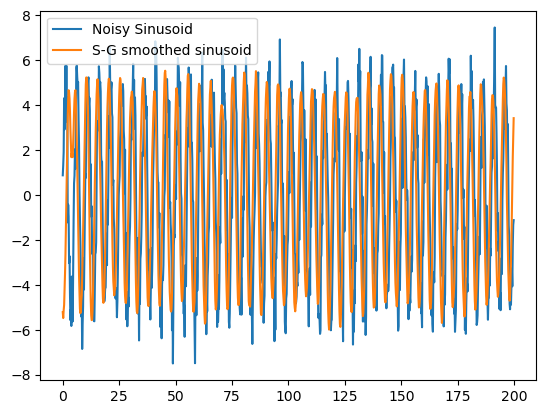

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Generate signal
dt = 1/5
t = np.arange(0, 200, dt)
x = 5*np.sin(2*np.pi*0.2*t) + np.random.randn(len(t))

# Smoothing using Savitzky-Golay filter
order = 4
framelen = 21
ycenter = savgol_filter(x, framelen, order, mode='mirror')  # 修改mode参数为正确的形式

# Compute transients
ybegin = np.flipud(savgol_filter(x[:framelen], framelen, order, mode='mirror'))
yend = savgol_filter(np.flipud(x[-framelen:]), framelen, order, mode='mirror')

# Concatenate transients and steady-state portion
y = np.concatenate((ybegin, ycenter, yend))

# Plotting
min_length = min(len(x), len(y))
plt.plot(t[:min_length], x[:min_length], label='Noisy Sinusoid')
plt.plot(t[:min_length], y[:min_length], label='S-G smoothed sinusoid')  # 修改平滑后信号的长度
plt.legend()
plt.show()
